<a href="https://colab.research.google.com/github/Laxmisowjanya/CVD-Prediction/blob/main/Project_Heart_Risk_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("Heart_Attack_Prediction_Dataset.csv")
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

## Data Cleaning

In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [ ]:
df.dtypes

,0
Patient ID,object
Age,int64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64


In [ ]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
#Separating the BP into systolic and diastolic
df['BP_systolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[0])
df['BP_diastolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[1])
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'BP_systolic',
       'BP_diastolic'],
      dtype='object')

In [ ]:
#replacing the blood pressure column by commenting and rearranging the systolic and diastolic columns
df = df[['Age', 'Sex', 'Cholesterol',
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]
df.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
#data types of systolic and diastolic blood pressure is object. change it to int
df['BP_systolic'] = pd.to_numeric(df['BP_systolic'])
df['BP_diastolic'] = pd.to_numeric(df['BP_diastolic'])
df.dtypes

,0
Age,int64
Sex,object
Cholesterol,int64
BP_systolic,int64
BP_diastolic,int64
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64


In [ ]:
df.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
# Copied the first dataframe
df2 = df.copy()
#df2.head()

In [ ]:
df2.columns

Index(['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
#Removing country, continent, hemisphere
df2 = df2[['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
#            'Country','Continent', 'Hemisphere',
           'Heart Attack Risk']]
df2.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165,93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174,99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163,100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91,88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,0


# Exploratory Data Analysis

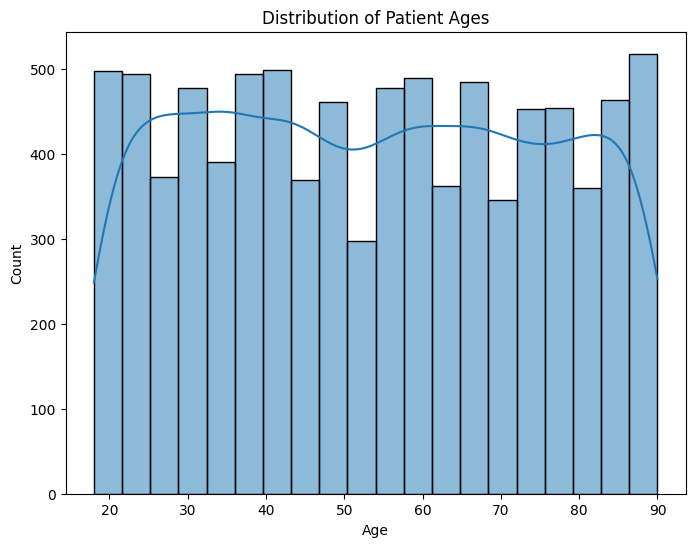

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
x = df.groupby('Heart Attack Risk').count().index
x

Index([0, 1], dtype='int64', name='Heart Attack Risk')

In [ ]:
y = df.groupby('Heart Attack Risk')['Age'].count()
y

,Age
Heart Attack Risk,
0,5624
1,3139


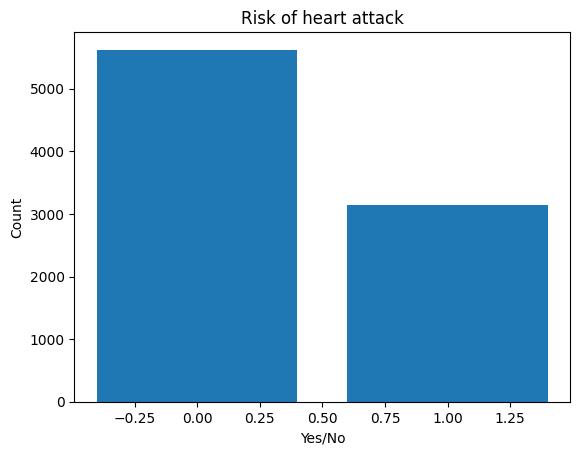

In [ ]:
plt.bar(x, y)
plt.title('Risk of heart attack')
plt.xlabel('Yes/No')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Finding the features which are most relevant to Heart Attack Risk")
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr

Finding the features which are most relevant to Heart Attack Risk


,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,0.003070,-0.009826,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000133,0.002083,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
BP_systolic,0.003070,0.000133,1.000000,0.013337,0.008482,-0.005306,-0.009762,-0.009534,-0.001918,0.010764,-0.009506,-0.011926,-0.001182,0.017848,0.003393,0.010414,0.004279,0.005121,-0.007574,-0.004628,0.018585
BP_diastolic,-0.009826,0.002083,0.013337,1.000000,-0.018113,-0.000512,0.017818,-0.012293,-0.020574,-0.007282,-0.003469,0.008813,0.004607,-0.008445,-0.006606,0.008816,0.000806,0.000545,0.016294,0.010679,-0.007509
Heart Rate,-0.003844,0.000315,0.008482,-0.018113,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,-0.005306,-0.000512,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.009762,0.017818,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.009534,-0.012293,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,-0.001918,-0.020574,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.010764,-0.007282,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778


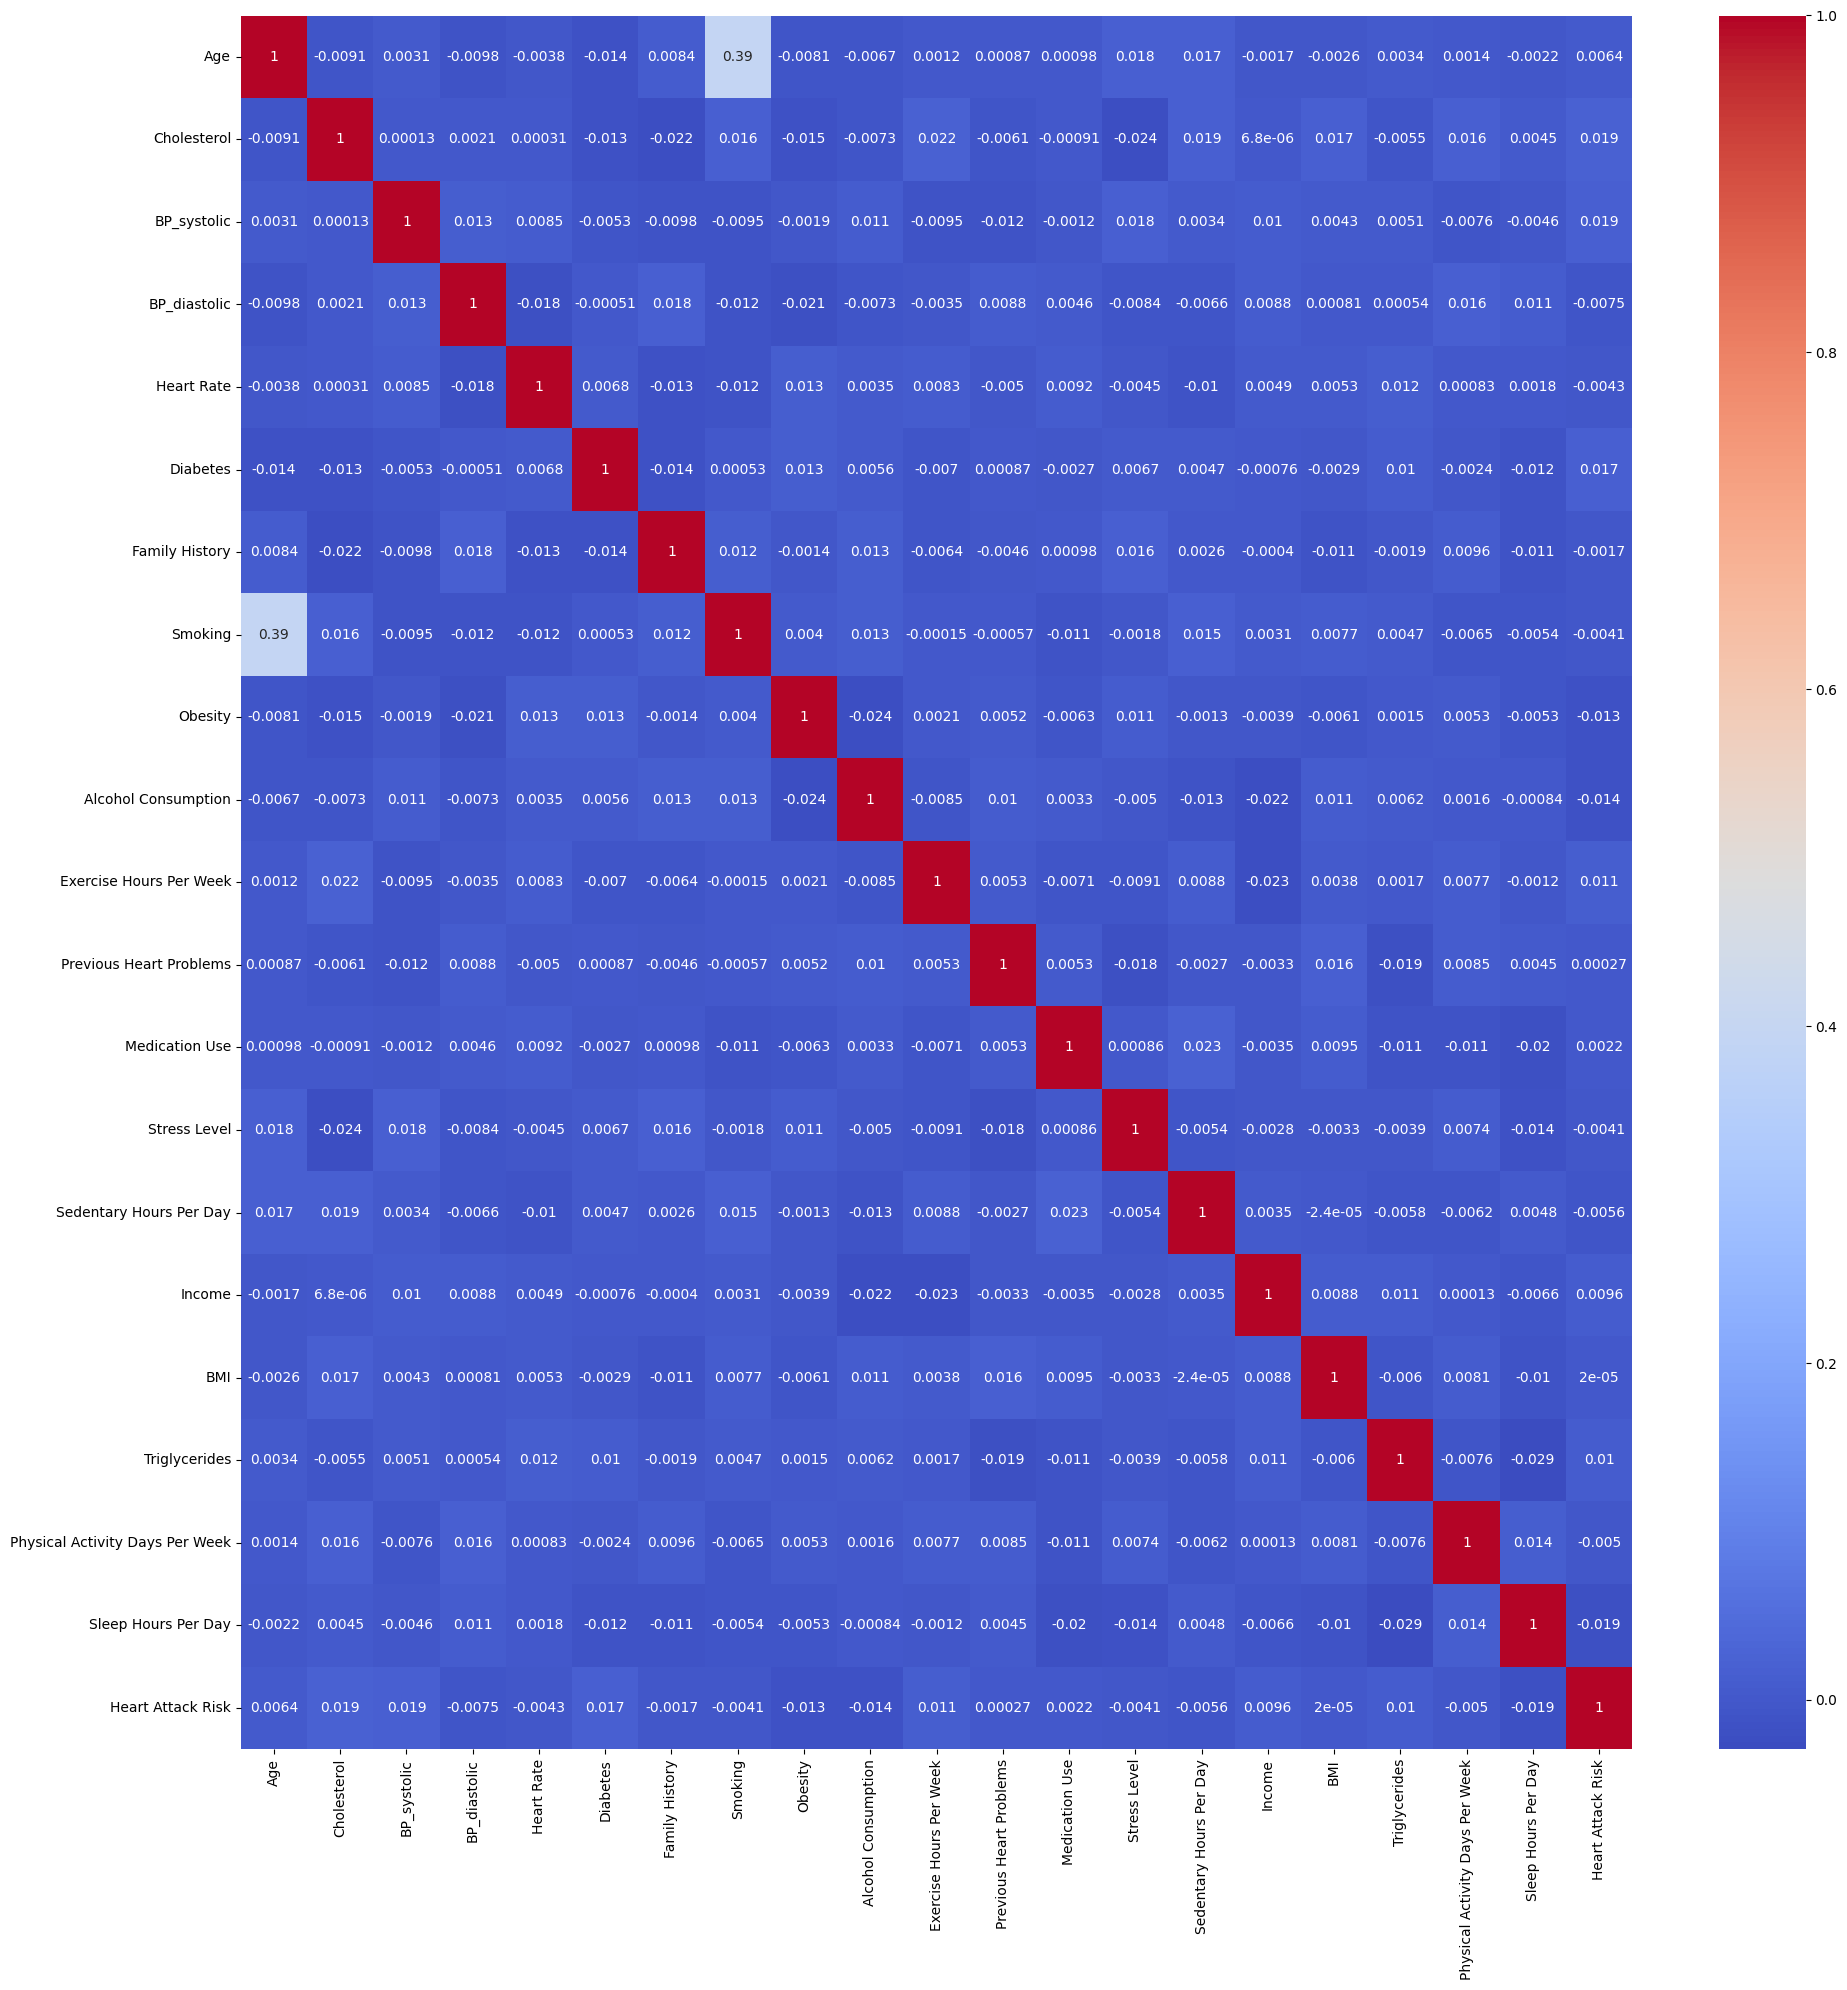

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
# sns.color_palette("mako", as_cmap=True)
plt.tight_layout()
plt.show()

## Thus we should drop few columns of df2

In [ ]:
df2.drop(['Sedentary Hours Per Day', 'Stress Level', 'Physical Activity Days Per Week'], axis=1, inplace=True)

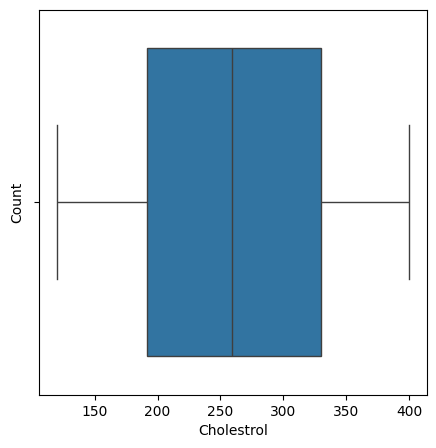

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Cholesterol')
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.show()

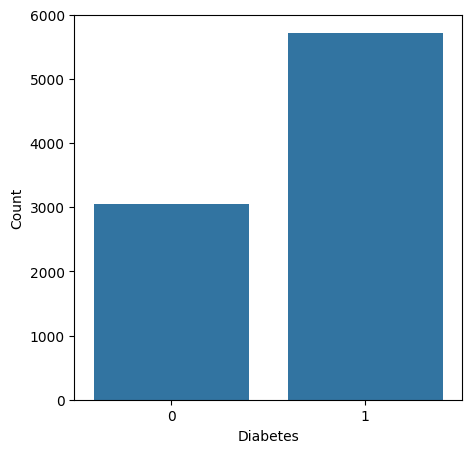

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Model prepration

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Sex and Diet are in object so we have to classify them into labels
df3 = df2.select_dtypes(include=['object'])
le = LabelEncoder()
label_encoder = {}
for column in df3:
    label_encoder[column] = le
    df3[column] = label_encoder[column].fit_transform(df2[column])
df3.head()

,Sex,Diet
0,1,0
1,1,2
2,0,1
3,1,0
4,1,2


In [ ]:
df4 = pd.read_csv("Heart_Attack_Prediction_Dataset.csv")
df4 = df4[['Sex', 'Diet']]
df4.columns

Index(['Sex', 'Diet'], dtype='object')

In [ ]:
result = pd.concat([df4, df3], axis=1)
result.head()

,Sex,Diet,Sex,Diet
0,Male,Average,1,0
1,Male,Unhealthy,1,2
2,Female,Healthy,0,1
3,Male,Average,1,0
4,Male,Unhealthy,1,2


In [ ]:
df2 = df2.drop(['Sex', 'Diet', ], axis=1)

In [ ]:
df2 = pd.concat([df2, df3], axis=1)
df2.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Sex,Diet
0,67,208,158,88,72,0,0,1,0,0,4.168189,0,0,261404,31.251233,286,6,0,1,0
1,21,389,165,93,98,1,1,1,1,1,1.813242,1,0,285768,27.194973,235,7,0,1,2
2,21,324,174,99,72,1,0,0,0,0,2.078353,1,1,235282,28.176571,587,4,0,0,1
3,84,383,163,100,73,1,1,1,0,1,9.828130,1,0,125640,36.464704,378,4,0,1,0
4,66,318,91,88,93,1,1,1,1,0,5.804299,1,0,160555,21.809144,231,5,0,1,2


# Model Training

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [ ]:
X = df2[['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use',
        'BMI', 'Triglycerides',
       'Sleep Hours Per Day',
       'Sex', 'Diet']]
y = df2[['Heart Attack Risk']]

## Rescaling the values

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

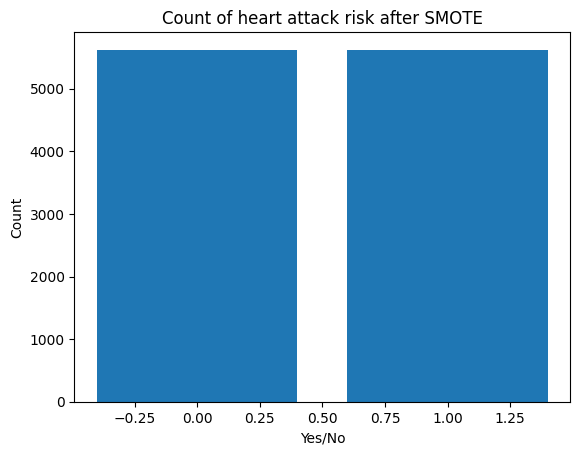

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of 'Heart Attack Risk'
risk_counts = y_resample['Heart Attack Risk'].value_counts()

# Plot the bar chart
plt.bar(risk_counts.index, risk_counts.values)
plt.title('Count of heart attack risk after SMOTE')
plt.xlabel('Yes/No')
plt.ylabel('Count')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [ ]:
from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [ ]:
X_scaled

array([[ 0.64160649, -0.6477889 ,  0.88256006, ..., -0.47481413,
         0.73081948, -1.17133477],
       [-1.55373089,  1.59785782,  1.15174695, ...,  0.04531728,
         0.73081948,  1.35337032],
       [-1.55373089,  0.7914101 ,  1.49784438, ..., -1.51507696,
        -1.36832697,  0.09101777],
       ...,
       [-0.79013528,  1.3124994 , -0.84792707, ..., -0.99494555,
         0.73081948, -1.17133477],
       [ 0.25980869, -1.19369197, -0.3095533 , ...,  0.5654487 ,
         0.73081948,  0.09101777],
       [ 0.92795485, -0.16392027,  0.42109683, ...,  0.04531728,
         0.73081948,  0.09101777]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split \
(X_scaled, y_resample, test_size=0.33, random_state=42)

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
classi = [
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['Support Vector Machines', SVC()],
    ['RandomForestClassifier', RandomForestClassifier \
     (random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')],
    ['K-Nearest Neighbors', KNeighborsClassifier()],
]

## Classification Report of all the models

In [ ]:
for key in classi:
    name = key[0]
    mod = key[1]
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    acc = accuracy_score(predictions, y_test)
    precision = precision_score(predictions, y_test)
    recall = recall_score(predictions, y_test)
    Y_predict = mod.predict(X_test)
    auc = roc_auc_score(y_test, y_test)
    print('Classification Report:',name)
    print(classification_report(y_test,predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, predictions))

Classification Report: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1857
           1       0.57      0.57      0.57      1855

    accuracy                           0.57      3712
   macro avg       0.57      0.57      0.57      3712
weighted avg       0.57      0.57      0.57      3712

ROC_AUC_SCORE is 0.5673495929294996
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1857
           1       0.66      0.54      0.60      1855

    accuracy                           0.63      3712
   macro avg       0.64      0.63      0.63      3712
weighted avg       0.64      0.63      0.63      3712

ROC_AUC_SCORE is 0.6319571752253802
Classification Report: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1857
           1       0.69   

# Confusion Matrix

### Decision Tree

In [ ]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

#Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)


In [ ]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

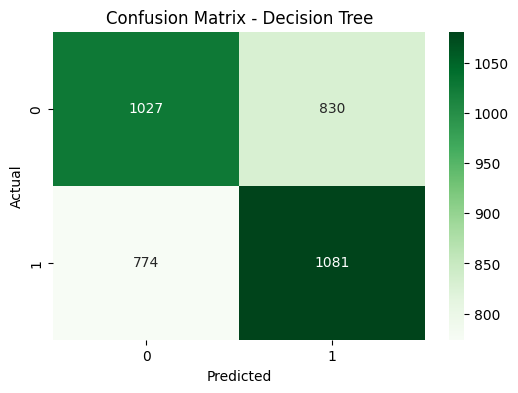

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

### Random Forest

In [ ]:
model = RandomForestClassifier \
(random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy')

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)

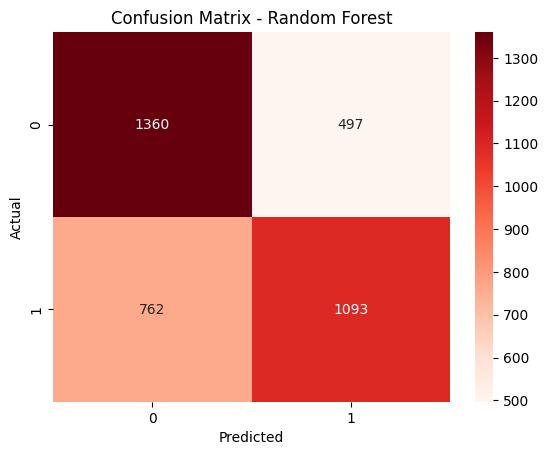

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### SVM

In [ ]:
# Initialize and train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Predict
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

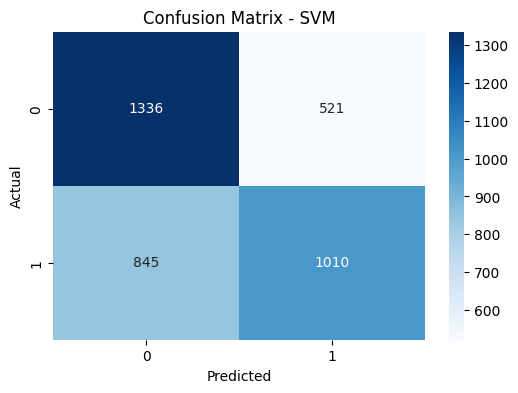

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

### K- Nearest Neighbour

In [ ]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predict
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

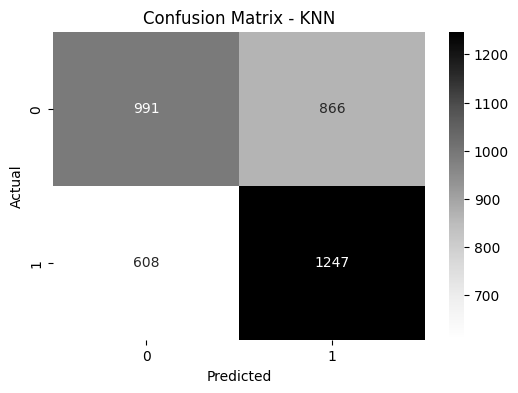

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [ ]:
from tabulate import tabulate
# Data
data = {
    'Decision Tree':   [0.56, 0.56, 0.56, 0.56, 0.5643846333067665],
    'SVM':             [0.64, 0.63, 0.63, 0.63, 0.6319571752253802],
    'Random Forest':   [0.66, 0.66, 0.66, 0.66, 0.6609711784215621],
    'KNN':             [0.60, 0.60, 0.60, 0.60, 0.6029468159379459]
}

# Row labels for metrics
metrics = ['Precision ', 'Recall ', 'F1-Score ', 'Accuracy', 'ROC_AUC Score']

# Create DataFrame
df_metrics = pd.DataFrame(data, index=metrics)
df_metrics = df_metrics.round(2)

# Format with tabulate
formatted_table = tabulate(df_metrics, headers="keys", tablefmt="grid")

# Display table
print(formatted_table)

+---------------+-----------------+-------+-----------------+-------+
|               |   Decision Tree |   SVM |   Random Forest |   KNN |
+===============+=================+=======+=================+=======+
| Precision     |            0.56 |  0.64 |            0.66 |   0.6 |
+---------------+-----------------+-------+-----------------+-------+
| Recall        |            0.56 |  0.63 |            0.66 |   0.6 |
+---------------+-----------------+-------+-----------------+-------+
| F1-Score      |            0.56 |  0.63 |            0.66 |   0.6 |
+---------------+-----------------+-------+-----------------+-------+
| Accuracy      |            0.56 |  0.63 |            0.66 |   0.6 |
+---------------+-----------------+-------+-----------------+-------+
| ROC_AUC Score |            0.56 |  0.63 |            0.66 |   0.6 |
+---------------+-----------------+-------+-----------------+-------+


# ROC Curve

### Decision Tree

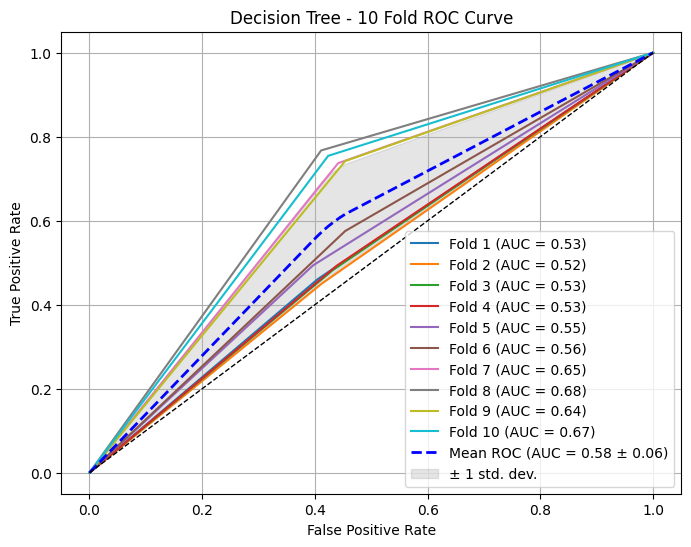

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Initialize Stratified K-Fold
cv = StratifiedKFold(n_splits=10)

# To store TPRs and AUCs
tpr_list = []
auc_list = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y_resample)):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_scaled[train_idx], y_resample.iloc[train_idx, 0])

    #Index of positive class
    pos_class_index = list(model.classes_).index(1)
    y_proba = model.predict_proba(X_scaled[test_idx])[:, pos_class_index]

    fpr, tpr, _ = roc_curve(y_resample.iloc[test_idx, 0], y_proba)
    roc_auc = roc_auc_score(y_resample.iloc[test_idx, 0], y_proba)
    auc_list.append(roc_auc)

    # Interpolate TPR
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tpr_list.append(tpr_interp)

    # Plot each fold
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Plot mean ROC curve
mean_tpr = np.mean(tpr_list, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)

plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)

# Plot std deviation area
std_tpr = np.std(tpr_list, axis=0)
tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=0.2,
                 label='± 1 std. dev.')

# Reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Plot formatting
plt.title('Decision Tree - 10 Fold ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Random Forest

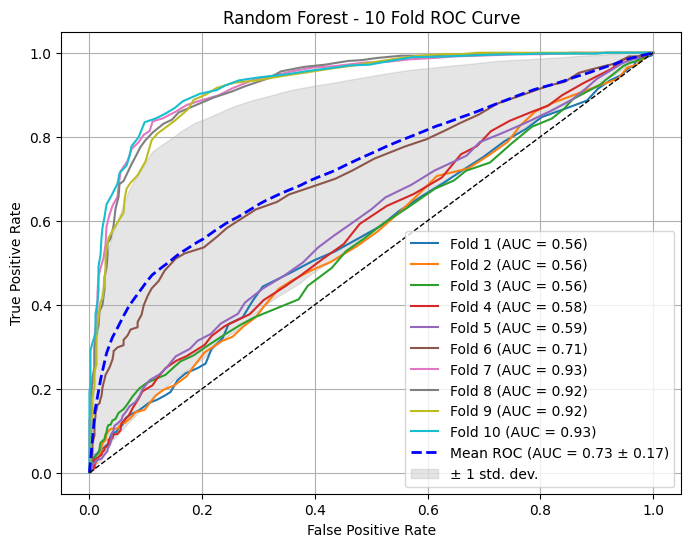

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Initialize Stratified K-Fold
cv = StratifiedKFold(n_splits=10)

# To store TPRs and AUCs
tpr_list = []
auc_list = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y_resample)):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_scaled[train_idx], y_resample.iloc[train_idx, 0])

    # Get index of positive class (usually 1)
    pos_class_index = list(model.classes_).index(1)
    y_proba = model.predict_proba(X_scaled[test_idx])[:, pos_class_index]

    fpr, tpr, _ = roc_curve(y_resample.iloc[test_idx, 0], y_proba)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)

    # Interpolate TPR
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tpr_list.append(tpr_interp)

    # Plot each fold
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Plot mean ROC curve
mean_tpr = np.mean(tpr_list, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)

plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)

# Plot standard deviation area
std_tpr = np.std(tpr_list, axis=0)
tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=0.2,
                 label='± 1 std. dev.')

# Reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Plot formatting
plt.title('Random Forest - 10 Fold ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Support Vector Machine

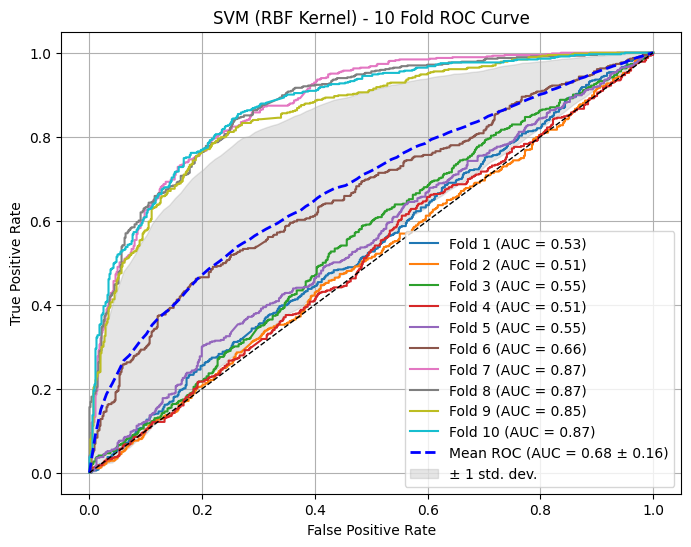

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Initialize Stratified K-Fold
cv = StratifiedKFold(n_splits=10)

# To store TPRs and AUCs
tpr_list = []
auc_list = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y_resample)):
    model = SVC(kernel='rbf', probability=True, random_state=42)
    model.fit(X_scaled[train_idx], y_resample.iloc[train_idx, 0])

    # Get probability estimates for positive class (usually class 1)
    pos_class_index = list(model.classes_).index(1)
    y_proba = model.predict_proba(X_scaled[test_idx])[:, pos_class_index]

    fpr, tpr, _ = roc_curve(y_resample.iloc[test_idx, 0], y_proba)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)

    # Interpolate TPR
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tpr_list.append(tpr_interp)

    # Plot each fold
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Plot mean ROC curve
mean_tpr = np.mean(tpr_list, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)

plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)

# Plot standard deviation area
std_tpr = np.std(tpr_list, axis=0)
tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=0.2,
                 label='± 1 std. dev.')

# Reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Plot formatting
plt.title('SVM (RBF Kernel) - 10 Fold ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Example

In [ ]:
def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

In [ ]:
def determine_lifestyle_changes(predict_type, dictionary):
    lifestyle_changes = []
    if predict_type > 0:
        if 'Smoking' in new_person and new_person['Smoking'] == 1:
            lifestyle_changes.append('quit smoking')
        if 'BMI' in new_person and new_person['BMI'] < 18.5:
            lifestyle_changes.append('gain weight')
        elif 'BMI' in new_person and new_person['BMI'] > 25:
            lifestyle_changes.append('lose weight')
        if 'Exercise Hours Per Week' in new_person and new_person['Exercise Hours Per Week'] < 1.25:
            lifestyle_changes.append('do more exercise')
        if 'Diet' in new_person and new_person['Diet'] == 0:
            lifestyle_changes.append('eat healthy food')
        if 'Alcohol Consumption' in new_person and new_person['Alcohol Consumption'] == 1:
            lifestyle_changes.append('try reducing alcohol')
        print("Heart attack risk:", predict_type)
        for i in lifestyle_changes:
            print(f"Please {i},")
        print("This can reduce your heart rate risk.")

    if predict_type > 0.75:
        print("You should consult a doctor immediately.")
        print("Heart attack risk:", predict_type)
    else:
        print("Heart attack risk: 0")

In [ ]:
new_person = {'Age': 43, 'Cholesterol': 420, 'BP_systolic': 155, 'BP_diastolic': 78, 'Heart Rate': 65,
       'Diabetes': 1, 'Family History': 0, 'Smoking': 1, 'Obesity': 1, 'Alcohol Consumption':1,
       'Exercise Hours Per Week': 4.78, 'Previous Heart Problems':0, 'Medication Use':1,
        'BMI': 30.49, 'Triglycerides': 580 , 'Sleep Hours Per Day' : 6, 'Sex': 1, 'Diet': 0}
dict1 = pd.DataFrame([new_person])
x = dicti_vals(new_person)
x

array([[ 43.  , 420.  , 155.  ,  78.  ,  65.  ,   1.  ,   0.  ,   1.  ,
          1.  ,   1.  ,   4.78,   0.  ,   1.  ,  30.49, 580.  ,   6.  ,
          1.  ,   0.  ]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=30, criterion='entropy')
model.fit(X_train, y_train)

#model prediction
model.predict(x)

array([0])

In [ ]:
predict_type = model.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

Heart attack risk: [0.47333333]
Please quit smoking,
Please lose weight,
Please eat healthy food,
Please try reducing alcohol,
This can reduce your heart rate risk.
Heart attack risk: 0
